#Regression

#1.Loading and Preprocessing

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [30]:
print("Loading and Preprocessing\n")

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(f"Missing values in dataset:\n{X.isnull().sum()}\n")

#Justification: SVR and Gradient Boosting are sensitive to feature magnitude.
#Standardization ensures features like 'Population' don't outweigh 'HouseAge'.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Data loading and scaling complete.\n")

Loading and Preprocessing

Missing values in dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Data loading and scaling complete.



##Justification of Preprocessing

###-Missing Value Check:
Ensuring no data is missing prevents errors during model training.

###-Standardization (StandardScaler):
This is crucial because features like Population have much larger ranges than MedInc. SVR and Gradient-based models are sensitive to the scale of input data; without scaling, large-magnitude features would dominate the model's learning process.

#2.Regression Algorithm Implementation

In [31]:
print("Training Models\n")

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel='rbf')
}

performance_metrics = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance_metrics[name] = {"MSE": mse, "MAE": mae, "R2": r2}

print("\nModel training complete.\n")

Training Models

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training SVR...

Model training complete.



##Linear Regression
###How it works:
It models a linear relationship between features and the target by minimizing the sum of squared residuals.
###Suitability:
Good baseline to see if the relationship is primarily linear.

##Decision Tree Regressor
###How it works:
-It splits the data into branches based on feature values that result in the highest information gain (lowest variance).

###Suitability:
-Captures non-linear relationships and interactions between features without needing much tuning.

##Random Forest Regressor
###How it works:
-An ensemble method that builds multiple decision trees and averages their results to reduce variance (overfitting).
###Suitability:
-Highly robust for this dataset as it handles the outliers often found in housing prices.

##Gradient Boosting Regressor
###How it works:
-It builds trees sequentially, where each new tree attempts to correct the errors (residuals) made by previous trees.
###Suitability:
-Usually the most accurate for tabular data like this, as it focuses on minimizing the loss function.

##Support Vector Regressor (SVR)
###How it works:
-It finds a hyperplane in a high-dimensional space that has a maximum number of points within a specified boundary ($\epsilon$).
###Suitability:
-Effective if there are complex patterns, though it requires scaled data to perform well.

#3.Model Evaluation and Comparison

In [32]:
print("Performance Comparison\n")
results_df = pd.DataFrame(performance_metrics).T
results_df = results_df.sort_values(by="R2", ascending=False)
print("Final Results Table:")
print(results_df)

Performance Comparison

Final Results Table:
                        MSE       MAE        R2
Random Forest      0.255498  0.327613  0.805024
Gradient Boosting  0.293999  0.371650  0.775643
SVR                0.355198  0.397763  0.728941
Decision Tree      0.494272  0.453784  0.622811
Linear Regression  0.555892  0.533200  0.575788


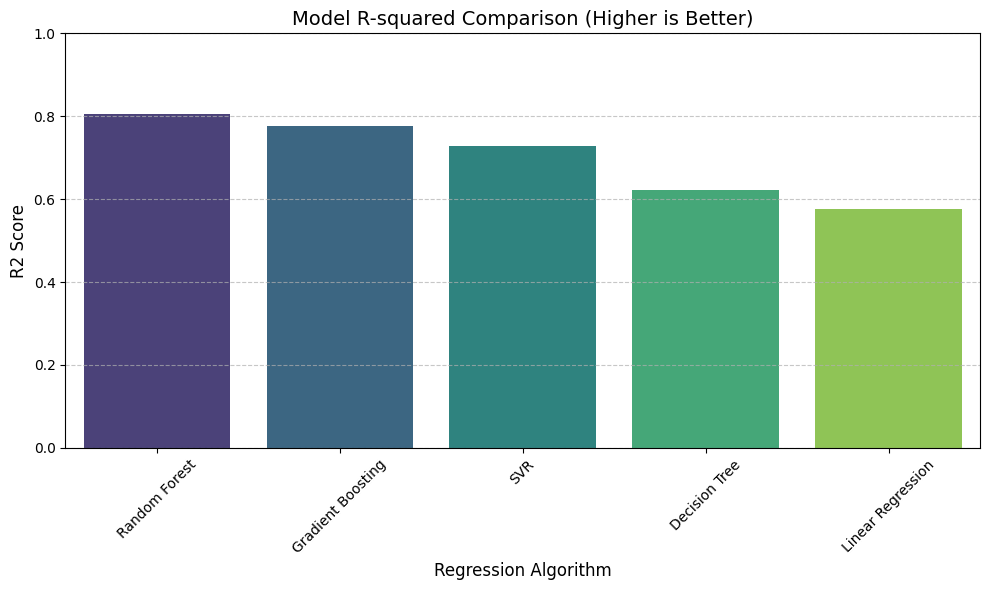

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=results_df.index,
    y=results_df['R2'],
    hue=results_df.index,
    palette='viridis',
    legend=False
)

plt.title('Model R-squared Comparison (Higher is Better)', fontsize=14)
plt.ylabel('R2 Score', fontsize=12)
plt.xlabel('Regression Algorithm', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#The Best Performing Algorithm: Random Forest Regressor

#Justification:
###-The Random Forest Regressor achieved the highest $R^2$ score ($0.805$) and the lowest MSE and MAE.

#Reasoning:
###-As an ensemble method, Random Forest builds multiple decision trees and averages their results.
###-This "bagging" technique effectively handles the non-linear relationships and complex interactions between features in the California dataset (such as the relationship between location coordinates and house prices) while significantly reducing the risk of overfitting compared to a single decision tree.

#The Worst Performing Algorithm: Linear Regression

#Justification:
###-Linear Regression resulted in the lowest $R^2$ score ($0.575$) and the highest error rates across all metrics.

#Reasoning:
###-Linear Regression assumes a strictly linear relationship between the input features and the target variable.
###-The California Housing dataset contains complex, non-linear patterns (especially geographic data) that a simple linear hyperplane cannot capture.
###-This "underfitting" explains why its predictive power is significantly lower than the ensemble or non-linear models.